In [0]:
import numpy as np

In [0]:
class Perceptron(object):
  """Perceptron classifier.
  Parameters
  -----------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    passes over the training dataset.
  random_state : int
    Rabdom number generator seed for weight
    initialization
    
  Attributes
  -----------
  w_ : 1d-array
    Weights after fitting. 
  errors_ : list
    Number of misclassification (updates) in each epoch.
  """
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    """Fit training data.
    
    Parameters
    -----------
    X : {array-like}, shape = [n_samples, n_features]
      Training vectors, where n_samples is the number of
      samples and
    y : array-like, shape = [n_samples]
      targer values.
    
    Returns
    --------
    self : object
    
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01,
                         size = 1 + X.shape[1])
    self.errors_ = []
    
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  
  def net_input(self, X):
    """Calculation net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)
  

In [0]:
v1 = np.array([1, 2, 3])

In [0]:
v2 = 0.5 * v1

In [58]:
v2

array([0.5, 1. , 1.5])

In [59]:
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * 
                        np.linalg.norm(v2)))

0.0

In [38]:
np.linalg.norm(v1)

3.7416573867739413

In [39]:
np.linalg.norm(v2)

1.8708286933869707

In [40]:
v1.dot(v2)

7.0

In [41]:
(7.0 / (3.7416573867739413 * 1.8708286933869707))

1.0

In [42]:
np.arccos(1.0)

0.0

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)

In [6]:
df.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
import matplotlib.pyplot as plt

In [0]:
#select setosa and versicolor
y = df.iloc[0:100, 4].values

In [49]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [0]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [51]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [0]:
#Extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

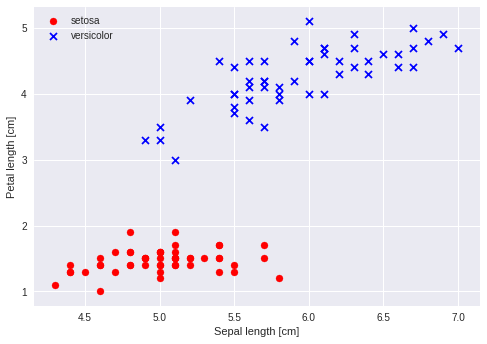

In [12]:
#Plot data
plt.scatter(X[:50, 0], X[:50, 1],
           color = 'red', marker='o',
           label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color = 'blue', marker='x',
           label = 'versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

Text(0.5, 0, 'Epochs')

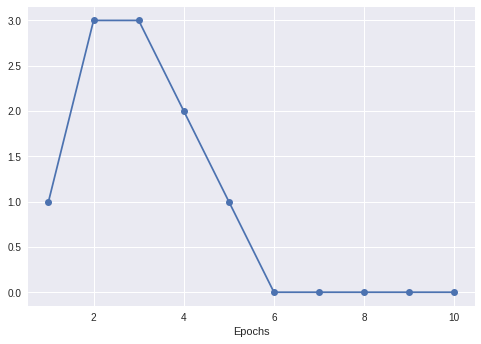

In [13]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')
plt.xlabel('Epochs')

In [0]:
from matplotlib.colors import ListedColormap

In [0]:
def plot_decision_regions(X, y, classifier, resolution= 0.02):
  #Setup marker generator and color map
  marker = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  #plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
  
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  # Plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0],
                y = X[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = marker[idx],
               label = cl,
               edgecolor = 'black')

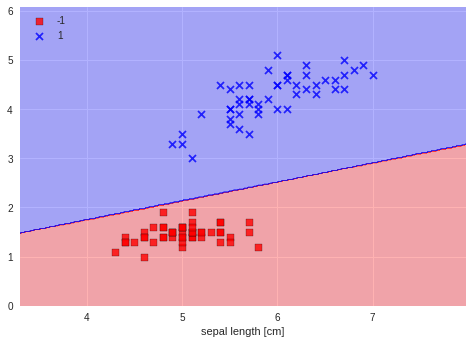

In [16]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.xlabel('sepal length [cm]')
plt.legend(loc='upper left')
plt.show()